# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


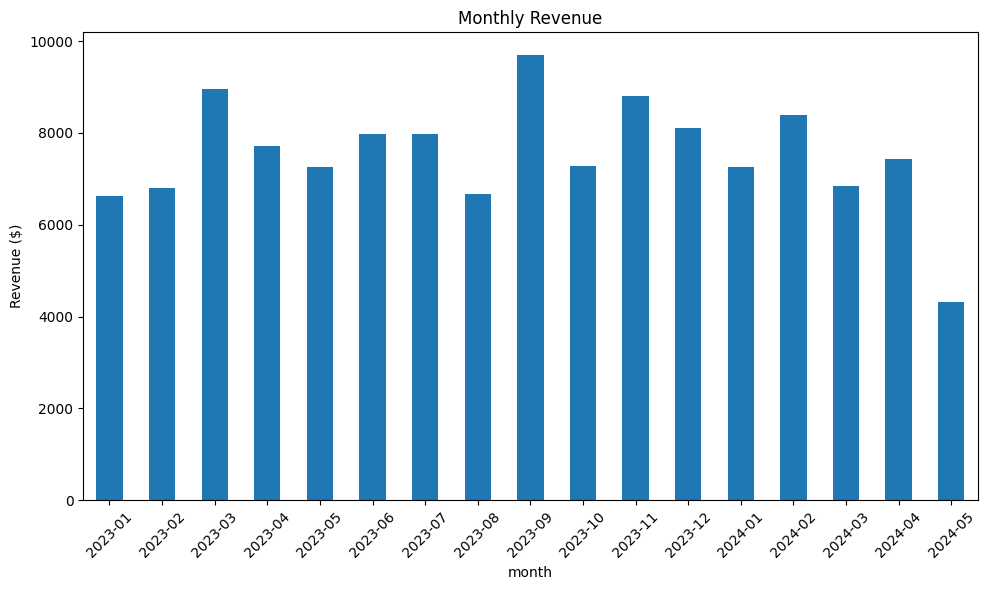

In [4]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

month
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


<Axes: xlabel='month'>

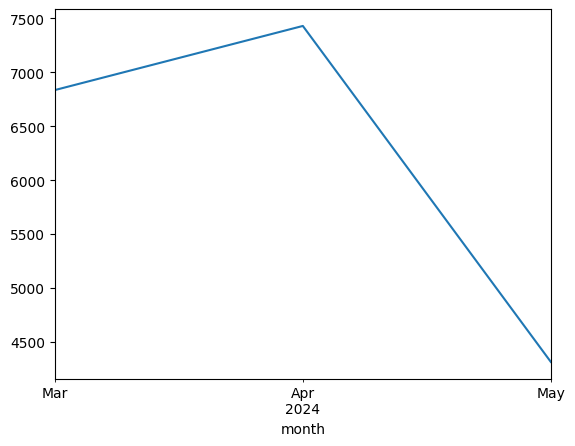

In [ ]:
# Your code here
last_quater = data.groupby('month')['revenue'].sum().tail(3)
print(last_quater)
last_quater.plot()

#revenue went up then down

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [ ]:
new=data.groupby('customer_id')['revenue'].sum()
sorted_data = new.sort_values(ascending= False)
sorted_data.head()

#customer 62 spent the most 

customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [ ]:
# Your code here

data.groupby('customer_segment')['revenue'].mean().sort_values(ascending = False)

#on average seniors spent the most

customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [ ]:
# Your code here
region_sorted = data.groupby('region')['revenue'].sum()
region_sorted.sort_values(ascending= False)

#the south has the highest revenue followed by the north then the east

region
South    34839.45
North    34351.69
East     31221.80
West     27727.73
Name: revenue, dtype: float64

In [ ]:
Average_order_size = data.groupby('region')['quantity'].mean()
Average_order_size.sort_values(ascending= False)

#this shows that the west ordered the most followed by a close east and south which shows that more order size doesnt didn't corrlate to revenue in this case

region
West     2.627273
East     2.469231
South    2.440945
North    2.360902
Name: quantity, dtype: float64

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [ ]:
# Your code here

Productgrouped = data.groupby('product_category')['quantity'].sum()
Productgrouped.sort_values(ascending= False)

#house products are the most popular follwed by clothing products

product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64

In [ ]:
ProductRevenue = data.groupby('product_category')['revenue'].sum()
ProductRevenue.sort_values(ascending= False)

#this matches the most popular products as more popular products are purchases more

product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

discount_applied
25    275.060
10    270.870
5     249.480
15    236.970
0     178.980
30    162.965
20    135.330
Name: revenue, dtype: float64


<Axes: xlabel='discount_applied'>

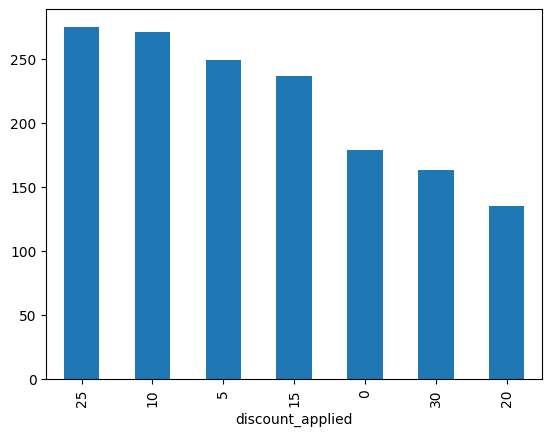

In [ ]:
# Your code here
discount = data.groupby('discount_applied')['revenue'].median().sort_values(ascending= False)
print(discount)
discount.plot(kind='bar')



#25% makes the most revenue

### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [ ]:
# Your code here
(data['payment_method'].value_counts() / data['payment_method'].count()) * 100

#credit cards are used the most while giftcard and Debit cards are close

payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: count, dtype: float64

In [ ]:
paymentgroup = data.groupby('payment_method')['revenue'].median()
paymentgroup.sort_values(ascending= False)

#maybe debit cards are correlated with higher spending but there are other factors

payment_method
Debit Card     234.160
Gift Card      215.750
Credit Card    186.630
PayPal         164.945
Name: revenue, dtype: float64

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

day_of_week
Monday       171.130
Tuesday      199.735
Wednesday    184.840
Thursday     164.040
Friday       205.580
Saturday     253.240
Sunday       190.060
Name: revenue, dtype: float64


<BarContainer object of 7 artists>

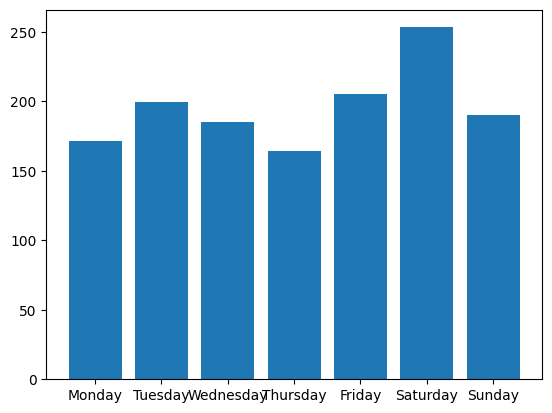

In [ ]:
# Your code here


revenue_by_day_sorted = data.groupby('day_of_week')['revenue'].median()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day_sorted = revenue_by_day_sorted.reindex(day_order)

print(revenue_by_day_sorted)

plt.bar(revenue_by_day_sorted.index,revenue_by_day_sorted.values)

#this shows that saturday has the highest day for revenue

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [ ]:
# Your code here

profit= data['revenue'].sum() * 0.2
print(f'The profit is $ {profit.round()} \n')


profit_region = (data.groupby('region')['revenue'].sum() * 0.2 ).sort_values(ascending = False)
print(f'Each Regions profit margin is\n{profit_region.round()}')

#the Most profitable region is the south

The profit is $ 25628.0 

Each Regions profit margin is
region
South    6968.0
North    6870.0
East     6244.0
West     5546.0
Name: revenue, dtype: float64


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

# I would recommend focusing on the south and give more discounts of 25%

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.